# Homework 1: Applied Machine Learning - Linear | Logisitc | SVM

In [ ]:
# Alexandre Raevel - UNI : atr2122
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [ ]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
pd.options.mode.chained_assignment = None

#**Part 1: Linear Regression**

In part 1, we will use **two datasets** to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:
   
**𝜖 ∼ Normal(0,3**)

**z = 3𝑥 + 10y + 10 + 𝜖**

In [ ]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
y = np.linspace(0, 5, 100)
z = 3 * x + 10 * y + 10 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

- Linearity: $y$ is a linear (technically affine) function of $x$.
- Independence: the $x$'s are independently drawn, and not dependent on each other.
- Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
- Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**1.1. Plot z vs x and z vs y in the synthetic dataset as scatter plots. Label your axes and make sure your y-axis starts from 0. Do the independent and dependent features have linear relationship?**

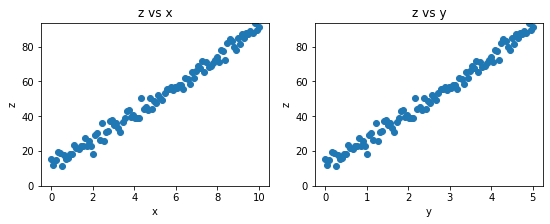

In [ ]:
### Your code here
plt.figure(figsize=(9,3))
plt.subplot(1, 2, 1)
plt.scatter(x,z)
plt.xlabel('x')
plt.ylabel('z')
plt.ylim(0, max(z))
plt.title('z vs x')

plt.subplot(1, 2, 2)
plt.scatter(y,z)
plt.xlabel('y')
plt.ylabel('z')
plt.title('z vs y')
plt.ylim(0, max(z))
plt.show()

In [ ]:
### Your code here

# The independent and dependent features have linear relationship

**1.2. Are the independent variables correlated? Use pearson correlation to verify? What would be the problem if linear regression is applied to correlated features?**

In [ ]:
### Your code here

# The independent variables are correlated, as both vectors are effectively linearly dependent.

import scipy

pearson_correl_res = scipy.stats.pearsonr(x, y)
print("The Pearson correlation of independent variables x and y is: ", pearson_correl_res[0])

# The Pearson correlation coefficient gives a value of 1, which indicates a perfect correlation
# Indeed, it is a perfect correlation as the Pearson correlation is bounded by [-1,1]
# Note that the second value of the Pearson correlation function in scipy denotes the p-value
# The p-value indicates probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets
# Here, we note that the p-value is 0, which indicates that there is no way x and y are uncorrelated

# If linear regression were applied to correlated features, we would have collinearity, which results in higher variance of the estimated coefficients
# Thus, the estimated coefficients corresponding to those correlated features would not be accurate



The Pearson correlation of independent variables x and y is:  1.0


**The second dataset we will be using is an auto MPG dataset. This dataset contains various characteristics for around 8128 cars. We will use linear regression to predict the selling_price label**

In [ ]:
auto_mpg_df = pd.read_csv('Car details v3.csv')
# Dropping Torque column, there is information in this column but it will take some preprocessing.
# The idea of the exercise is to familarize yourself with the basics of Linear regression.
auto_mpg_df = auto_mpg_df.drop(['torque'], axis = 1)

In [ ]:
auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


**1.3. Missing Value analysis - Auto mpg dataset.**

**Are there any missing values in the dataset? If so, what can be done about it? Jusify your approach.**

In [ ]:
### Your code here
missing_values_bool  = auto_mpg_df.isnull().values.any()
missing_values_total = auto_mpg_df.isnull().sum()

print(missing_values_total)
print("\n")
print("There are", sum(missing_values_total),"missing values in the entire dataset")

#auto_mpg_df = auto_mpg_df.fillna(auto_mpg_df.mean())
auto_mpg_df = auto_mpg_df.dropna()


# In the dataset, we note that some specific car models have missing values for mileage, engine, max power and seats
# What we could do is use the mean/median of the values for each of these metrics from the same category to fill in the gaps
# While using the mean of the category is not ideal, using it could give us relevant information that enables us to use all the data provided
# Alternatively, if we consider each car model features to be unique and not replaceable by the mean of the relevant feature, we are better off removing the car info alltogether
# Given the amount of data at our disposal, we choose to remove the rows that have missing values


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64


There are 878 missing values in the entire dataset


In [ ]:
# Sanity check to ensure we've removed all NaN values
print(auto_mpg_df.isnull().values.any())

False


**1.4. The features engine, max_power and mileage have units in the dataset. In the real world if we have such datasets, we generally remove the units from each feature. After doing so, convert the datatype of these columns to float. For example: 1248 CC engine is 1248, 23.4 kmpl is 23.4 and so on.**

**Hint: Check for distinct units in each of these features. A feature might have multiple units as well. Also, a feature could have no value but have unit. For example 'CC' without any value. Remove such rows.**

In [ ]:
### Your code here
# The first line removes the non-numeric parts in each column
# The second line converts the column elements from string to floats
# The third line removes any null components in the column

auto_mpg_df['engine'] = auto_mpg_df['engine'].astype(str).str.extract('(\d+)', expand=False)
auto_mpg_df['engine'] = pd.to_numeric(auto_mpg_df['engine'], downcast="float")
auto_mpg_df = auto_mpg_df[auto_mpg_df.engine.notnull()]

auto_mpg_df['max_power'] = auto_mpg_df['max_power'].astype(str).str.extract('(\d+)', expand=False)
auto_mpg_df['max_power'] = pd.to_numeric(auto_mpg_df['max_power'], downcast="float")
auto_mpg_df = auto_mpg_df[auto_mpg_df.max_power.notnull()]


auto_mpg_df['mileage'] = auto_mpg_df['mileage'].astype(str).str.extract('(\d+)', expand=False)
auto_mpg_df['mileage'] = pd.to_numeric(auto_mpg_df['mileage'], downcast="float")
auto_mpg_df = auto_mpg_df[auto_mpg_df.mileage.notnull()]


#print(auto_mpg_df['max_power'])

In [ ]:
auto_mpg_X = auto_mpg_df.drop(columns=['selling_price'])
auto_mpg_y = auto_mpg_df['selling_price']

**1.5. Plot the distribution of the label (selling_price) using a histogram. Make multiple plots with different binwidths. Make sure to label your axes while plotting.**

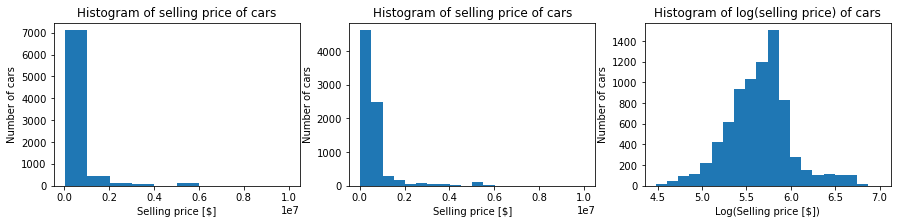

In [ ]:
### Your code here

plt.figure(figsize=(15,3))
plt.subplot(1, 3, 1)
plt.hist(auto_mpg_y)
plt.xlabel('Selling price [$]')
plt.ylabel('Number of cars')
plt.title('Histogram of selling price of cars')

plt.subplot(1, 3, 2)
plt.hist(auto_mpg_y,bins=20)
plt.xlabel('Selling price [$]')
plt.ylabel('Number of cars')
plt.title('Histogram of selling price of cars')

plt.subplot(1, 3, 3)
plt.hist(np.log10(auto_mpg_y),bins=20)
plt.xlabel('Log(Selling price [$])')
plt.ylabel('Number of cars')
plt.title('Histogram of log(selling price) of cars')
plt.show()



**1.6. Plot the relationships between the label (Selling Price) and the continuous features (Mileage, km driven, engine, max power) using a small multiple of scatter plots. 
Make sure to label the axes. Do you see something interesting about the distributions of these features.**

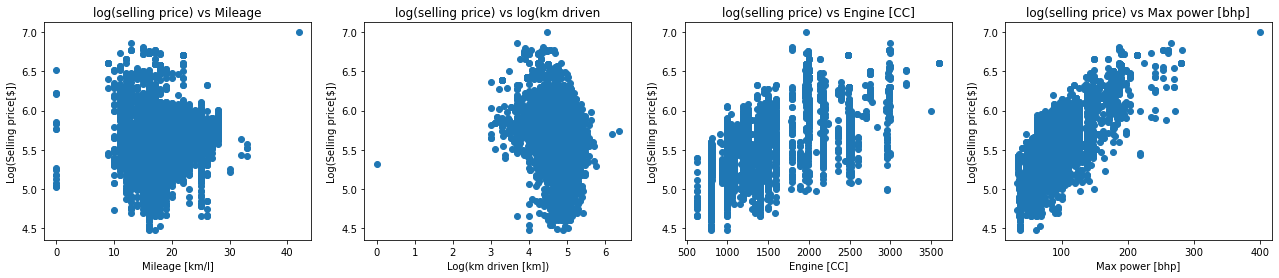

In [ ]:
### Your code here
scatter_dataset = auto_mpg_df[["selling_price", "mileage","km_driven","engine","max_power"]]
#pd.plotting.scatter_matrix(scatter_dataset,figsize=(20,20),grid=True)
#plt.show()

plt.figure(figsize=(22,4))
plt.subplot(1,4,1)
plt.scatter(scatter_dataset["mileage"],np.log10(scatter_dataset["selling_price"]))
plt.ylabel('Log(Selling price[$])')
plt.xlabel('Mileage [km/l]')
plt.title('log(selling price) vs Mileage')

plt.subplot(1,4,2)
plt.scatter(np.log10(scatter_dataset["km_driven"]),np.log10(scatter_dataset["selling_price"]))
plt.ylabel('Log(Selling price[$])')
plt.xlabel('Log(km driven [km])')
plt.title('log(selling price) vs log(km driven')

plt.subplot(1,4,3)
plt.scatter(scatter_dataset["engine"],np.log10(scatter_dataset["selling_price"]))
plt.ylabel('Log(Selling price[$])')
plt.xlabel('Engine [CC]')
plt.title('log(selling price) vs Engine [CC]')

plt.subplot(1,4,4)
plt.scatter(scatter_dataset["max_power"],np.log10(scatter_dataset["selling_price"]))
plt.ylabel('Log(Selling price[$])')
plt.xlabel('Max power [bhp]')
plt.title('log(selling price) vs Max power [bhp]')

plt.show()

# From these scatter plots, we see something interesting ab out the distributions of these features:
# 1) log(selling price) does not seem to vary much with the mileage
# 2) log(selling price) does not seem to vary much with the log(km driven)
# 3) log(selling price) seems to be correlated with the engine [CC]
# 4) log(selling price) seems to be correlated with the max power [bhp]
# Note that the log(selling price) transformation is warranted here to be able to infer meaningful relationships between dependent and independent variables


**1.7. Plot the relationships between the label (Selling Price) and the discrete features (fuel type, Seller type, transmission) using a small multiple of box plots. Make sure to label the axes.**

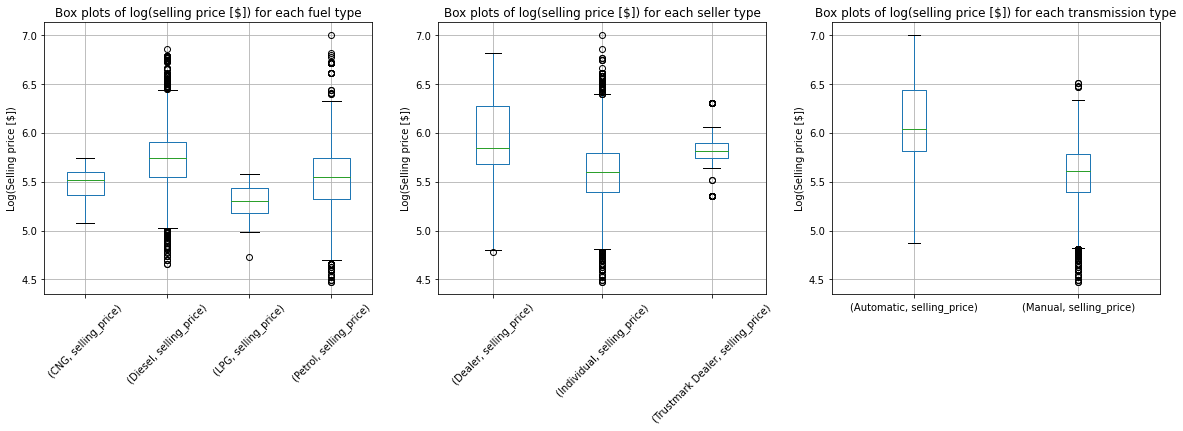

In [ ]:
### Your code here
# TO ADD TWO MORE BOX PLOTS !
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
grouped_df = pd.DataFrame(np.log10(auto_mpg_df['selling_price'])).groupby(auto_mpg_df['fuel']).boxplot("fuel")
plt.ylabel('Log(Selling price [$])')
plt.xticks(rotation=45)
plt.title('Box plots of log(selling price [$]) for each fuel type')

plt.subplot(1,3,2)
grouped_df2 = pd.DataFrame(np.log10(auto_mpg_df['selling_price'])).groupby(auto_mpg_df['seller_type']).boxplot("seller_type")
plt.ylabel('Log(Selling price [$])')
plt.xticks(rotation=45)
plt.title('Box plots of log(selling price [$]) for each seller type')

plt.subplot(1,3,3)
grouped_df3 = pd.DataFrame(np.log10(auto_mpg_df['selling_price'])).groupby(auto_mpg_df['transmission']).boxplot("transmission")
plt.ylabel('Log(Selling price [$])')
plt.title('Box plots of log(selling price [$]) for each transmission type')

plt.show()

    


**1.8. From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not?**

In [ ]:
### Your answer here
# Overall, linear regression is not a good model for this problem. This is because some features have a high IQ range and several outliers, which would make the MSE of the regression very high.

# Indeed, rom the visualizations above, linear regression may not be the most pertinent option for diesel and petrol fuel types, individual and dealer seller types and automatic and manual transmission types
# This is because all these types have many outliers and a high IQ range, which will yield a high MSE value (poor linear regression fit)
# However, if we consider only a subset of features as part of the regression, for CNG and LPG fuel types and for trustmark dealer seller type, linear regression seems appropriate as the IQ range is "small" and there are litte/no outliers

# 

In [ ]:
auto_mpg_X['year'] =  2020 - auto_mpg_X['year']

In [ ]:
#dropping the car name as it is irrelevant.
auto_mpg_X.drop(['name'],axis = 1,inplace=True)

#check out the dataset with new changes
auto_mpg_X.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,5.0
1,6,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,5.0
2,14,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.0,5.0
3,10,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0
4,13,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.0,5.0


**Data Pre-processing**

**1.9.
Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:**
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [ ]:
# 1. No categorical features in the synthetic dataset (skip this step) -> WE SHOULD NOT SKIP THIS STEP as the dataset contains categorical features!
# One hot encoding of categorical features
dummy_fuel = pd.get_dummies(auto_mpg_X['fuel'],prefix='Fuel')
auto_mpg_X = pd.merge(left=auto_mpg_X,right=dummy_fuel,left_index=True,right_index=True,)

dummy_seller_type = pd.get_dummies(auto_mpg_X['seller_type'],prefix='seller_type')
auto_mpg_X = pd.merge(left=auto_mpg_X,right=dummy_seller_type,left_index=True,right_index=True,)

dummy_transmission= pd.get_dummies(auto_mpg_X['transmission'],prefix='transmission')
auto_mpg_X = pd.merge(left=auto_mpg_X,right=dummy_transmission,left_index=True,right_index=True,)

dummy_owner= pd.get_dummies(auto_mpg_X['owner'],prefix='owner')
auto_mpg_X = pd.merge(left=auto_mpg_X,right=dummy_owner,left_index=True,right_index=True,)

auto_mpg_X.drop(['fuel','seller_type','transmission','owner'], axis = 1, inplace=True)

# I also thought about using one-hot encoding (code above), but the TA also suggested I consider ordinal encoding
# enc = OrdinalEncoder()
# auto_mpg_X['fuel'] = enc.fit_transform(auto_mpg_X['fuel'].to_numpy().reshape(-1,1))
# auto_mpg_X['transmission'] = enc.fit_transform(auto_mpg_X['transmission'].to_numpy().reshape(-1,1))
# auto_mpg_X['owner'] = enc.fit_transform(auto_mpg_X['owner'].to_numpy().reshape(-1,1))
# auto_mpg_X['seller_type'] = enc.fit_transform(auto_mpg_X['seller_type'].to_numpy().reshape(-1,1))

display(auto_mpg_X.head())

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
auto_mpg_X_dev, auto_mpg_X_test, auto_mpg_y_dev, auto_mpg_y_test = train_test_split(auto_mpg_X, auto_mpg_y,train_size = 0.8, test_size=0.2,random_state=42)
auto_mpg_X_train, auto_mpg_X_val, auto_mpg_y_train, auto_mpg_y_val = train_test_split(auto_mpg_X_dev, auto_mpg_y_dev,train_size = 0.75, test_size=0.25,random_state=42)

# 3. Standardize the columns in the feature matrices

from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
auto_mpg_X_train = scaler.fit_transform(auto_mpg_X_train)
auto_mpg_X_val   = scaler.transform(auto_mpg_X_val)
auto_mpg_X_test  = scaler.transform(auto_mpg_X_test)

#print(auto_mpg_X_train)
# 4. Add a column of ones to the feature matrices
auto_mpg_X_train = np.append(auto_mpg_X_train, np.ones((auto_mpg_X_train.shape[0],1)), axis = 1)
auto_mpg_X_val = np.append(auto_mpg_X_val, np.ones((auto_mpg_X_val.shape[0],1)), axis = 1)
auto_mpg_X_test = np.append(auto_mpg_X_test, np.ones((auto_mpg_X_test.shape[0],1)), axis = 1)



,year,km_driven,mileage,engine,max_power,seats,Fuel_CNG,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,6,145500,23.0,1248.0,74.0,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,6,120000,21.0,1498.0,103.0,5.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,14,140000,17.0,1497.0,78.0,5.0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,10,127000,23.0,1396.0,90.0,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
4,13,120000,16.0,1298.0,88.0,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0


**At the end of this pre-processing, you should have the following vectors and matrices:**

**- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test**

**Implement Linear Regression**

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**1.10. Implement a `LinearRegression` class with two methods: `train` and `predict`. You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [ ]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        stb = self.alpha*np.identity(X.shape[1])
        #print(stb.shape)
        XX_term = np.matmul(X.transpose(),X)
        #print(XX_term.shape)
        inverse_matrix = np.linalg.inv(XX_term+stb)
        #print(inverse_matrix.shape)
        #print(X.transpose().shape)
        #print(y.shape)
        self.w = np.matmul(np.matmul(inverse_matrix,X.transpose()),y)

    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y = np.matmul(X,self.w)
        return y

**Train, Evaluate, and Interpret Linear Regression Model**

**1.11. A) Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 5 predictions on the test set, along with the actual labels.**

In [ ]:
### Your code here
a = LinearRegression()

a.train(auto_mpg_X_train,auto_mpg_y_train)
predict_train = a.predict(auto_mpg_X_train)
predict_valid = a.predict(auto_mpg_X_val)
predict_test  = a.predict(auto_mpg_X_test)

#from sklearn.metrics import r2_score 
#res = r2_score(auto_mpg_y_train,predict_train)
#print(res)

MSE_training   = np.square(np.subtract(auto_mpg_y_train,predict_train)).mean()
MSE_validation = np.square(np.subtract(auto_mpg_y_val,predict_valid)).mean()
MSE_test       = np.square(np.subtract(auto_mpg_y_test,predict_test)).mean()

print("The MSE for the training set is: ", MSE_training)
print("The MSE for the validation set is: ", MSE_validation)
print("The MSE for the test set is: ", MSE_test)

print("The first 5 predictions on the test set are: ")
print(predict_test[0:5])
print("The first 5 actual labels on the test set are:")
print(auto_mpg_y_test[0:5].to_numpy())


The MSE for the training set is:  275784699923.19653
The MSE for the validation set is:  265305195135.721
The MSE for the test set is:  293095142847.5946
The first 5 predictions on the test set are: 
[ 590785.14046292  576320.90330428  365884.76819707  616229.0902193
 1640659.8150534 ]
The first 5 actual labels on the test set are:
[501000 440000 140000 476999 620000]


**B) As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.**

In [ ]:
### Your code here
training_labels_mean = auto_mpg_y_train.mean()
MSE_training   = np.square(np.subtract(auto_mpg_y_train,training_labels_mean)).mean()
MSE_validation = np.square(np.subtract(auto_mpg_y_val,training_labels_mean)).mean()
MSE_test       = np.square(np.subtract(auto_mpg_y_test,training_labels_mean)).mean()

print("The MSE for the training set is: ", MSE_training)
print("The MSE for the validation set is: ", MSE_validation)
print("The MSE for the test set is: ", MSE_test)
# We do observe the linear regression MSEs are much lower than these baselines MSEs

The MSE for the training set is:  662695177733.7599
The MSE for the validation set is:  625775241109.3219
The MSE for the test set is:  695299107097.1235


**1.12. Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! Use lecture 3, slide 15 as a reference. According to your model, which features are the greatest contributors to the selling price**

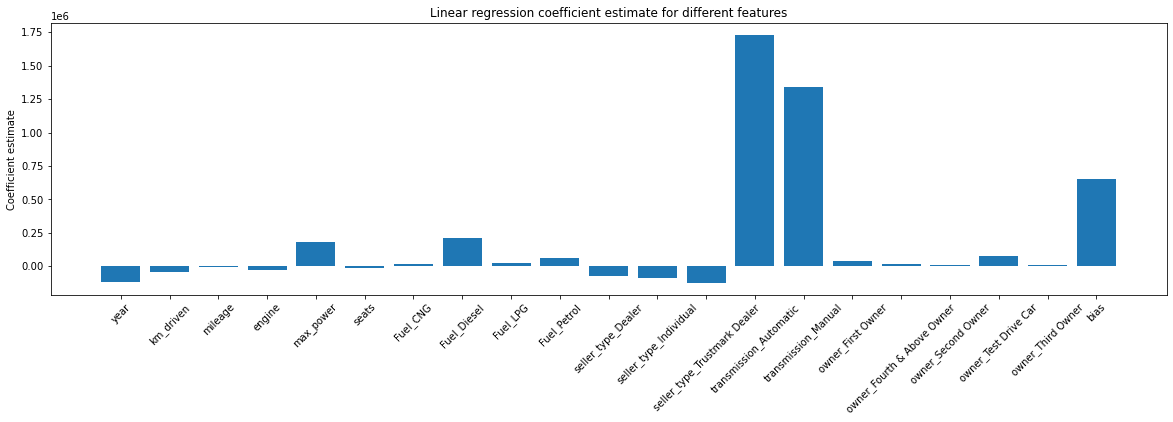

In [ ]:
### Your code here
plt.figure(figsize=(20,5))
x = list(auto_mpg_X.columns)
x.append('bias')
plt.bar(x,list(a.w))
plt.xticks(rotation=45)
plt.ylabel('Coefficient estimate')
plt.title('Linear regression coefficient estimate for different features')
plt.show()

#According to our model, the trustmark dealer seller type, transmission automatic and bias features are the most important features to the selling price.

**Tune Regularization Parameter $\alpha$**

**Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.**

**1.13. Sweep out values for $\alpha$ using `alphas = np.logspace(-2, 1, 10)`. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.**

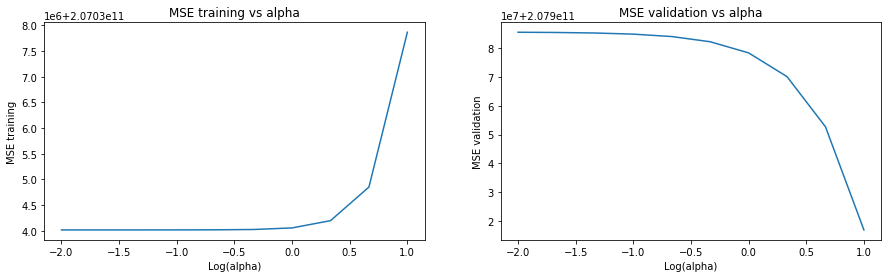

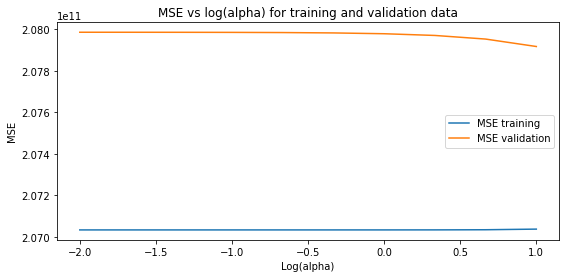

In [ ]:
### Your code here
from sklearn.linear_model import Ridge

#alphas = np.logspace(-2, 3, 100)
alphas = np.logspace(-2,1,10)
#pipe = make_pipeline(GridSearch(Ridge(),param_grid=[{'alpha':np.logspace(-3,3,10)}],return_train_score=True))
#pipe.fit(auto_mpg_X_train,auto_mpg_y_train)
#pipe.named_steps["grid_search"]
mse_training   = []
mse_validation = []

for alpha in alphas:
    model = LinearRegression(alpha=alpha)
    model.train(auto_mpg_X_train,auto_mpg_y_train)
    predict_train = model.predict(auto_mpg_X_train)
    predict_valid = model.predict(auto_mpg_X_val)
    mse_training.append(np.square(np.subtract(auto_mpg_y_train,predict_train)).mean())
    mse_validation.append(np.square(np.subtract(auto_mpg_y_val,predict_valid)).mean())

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(np.log10(alphas),mse_training)
plt.xlabel('Log(alpha)')
plt.ylabel('MSE training')
plt.title('MSE training vs alpha')
plt.subplot(1,2,2)
plt.plot(np.log10(alphas),mse_validation)
plt.xlabel('Log(alpha)')
plt.ylabel('MSE validation')
plt.title('MSE validation vs alpha')
plt.show()

plt.figure(figsize=(9,4))
plt.plot(np.log10(alphas),mse_training,label='MSE training')
plt.plot(np.log10(alphas),mse_validation,label='MSE validation')
plt.ylabel('MSE')
plt.xlabel('Log(alpha)')
plt.title('MSE vs log(alpha) for training and validation data')
plt.legend()
plt.show()


**Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?**

In [ ]:
### Your answer here
# We observe that the training MSE is below the validation MSE, as expected
# For increasing alpha, we see that the training MSE increases, while the validation MSE decreases

**1.14. Using the $\alpha$ which gave the best validation MSE above, train a model on the training set. Report the value of $\alpha$ and its training, validation, and test MSE. This is the final tuned model which you would deploy in production.**

In [ ]:
### Your code here
best_validation_mse = min(mse_validation)
best_alpha           = alphas[mse_validation.index(best_validation_mse)]

best_model = LinearRegression(alpha=alpha)
best_model.train(auto_mpg_X_train,auto_mpg_y_train)

predict_train = best_model.predict(auto_mpg_X_train)
predict_valid = best_model.predict(auto_mpg_X_val)
predict_test  = best_model.predict(auto_mpg_X_test)

mse_training   = (np.square(np.subtract(auto_mpg_y_train,predict_train)).mean())
mse_validation = (np.square(np.subtract(auto_mpg_y_val,predict_valid)).mean())
mse_test       = (np.square(np.subtract(auto_mpg_y_test,predict_test)).mean())

print("The best model alpha is: ", best_alpha)
print("The best model training MSE is: ", mse_training)
print("The best model validation MSE is: ", mse_validation)
print("The best model test MSE is: ", mse_test)


The best model alpha is:  10.0
The best model training MSE is:  207037864234.8465
The best model validation MSE is:  207916913154.10883
The best model test MSE is:  215286238735.36826


# **Part 2: Logistic Regression**

**Gender Recognition by Voice and Speech Analysis**

**This dataset is used to identify a voice as male or female, based upon acoustic properties of the voice and speech.**

In [ ]:
voice_df = pd.read_csv("voice-classification.csv")
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Data - Checking Rows & Columns**

In [ ]:
#Number of Rows & Columns
print(voice_df.shape) 

(3168, 21)


**2.1 What is the probability of observing different  categories in the Label feature of the dataset?**

This is mainly to check class imbalance in the dataset, and to apply different techniques to balance the dataset, which we will learn later.

In [ ]:
#code here
display(voice_df['label'].value_counts())
# The probability of observing different categories in the label feature of the dataset is 50%. 
# This feature in the dataset is "perfectly balanced"

female    1584
male      1584
Name: label, dtype: int64

**2.2 Plot the relationships between the label and the 20 numerical features using a small multiple of box plots. Make sure to label the axes. What useful information do this plot provide?**

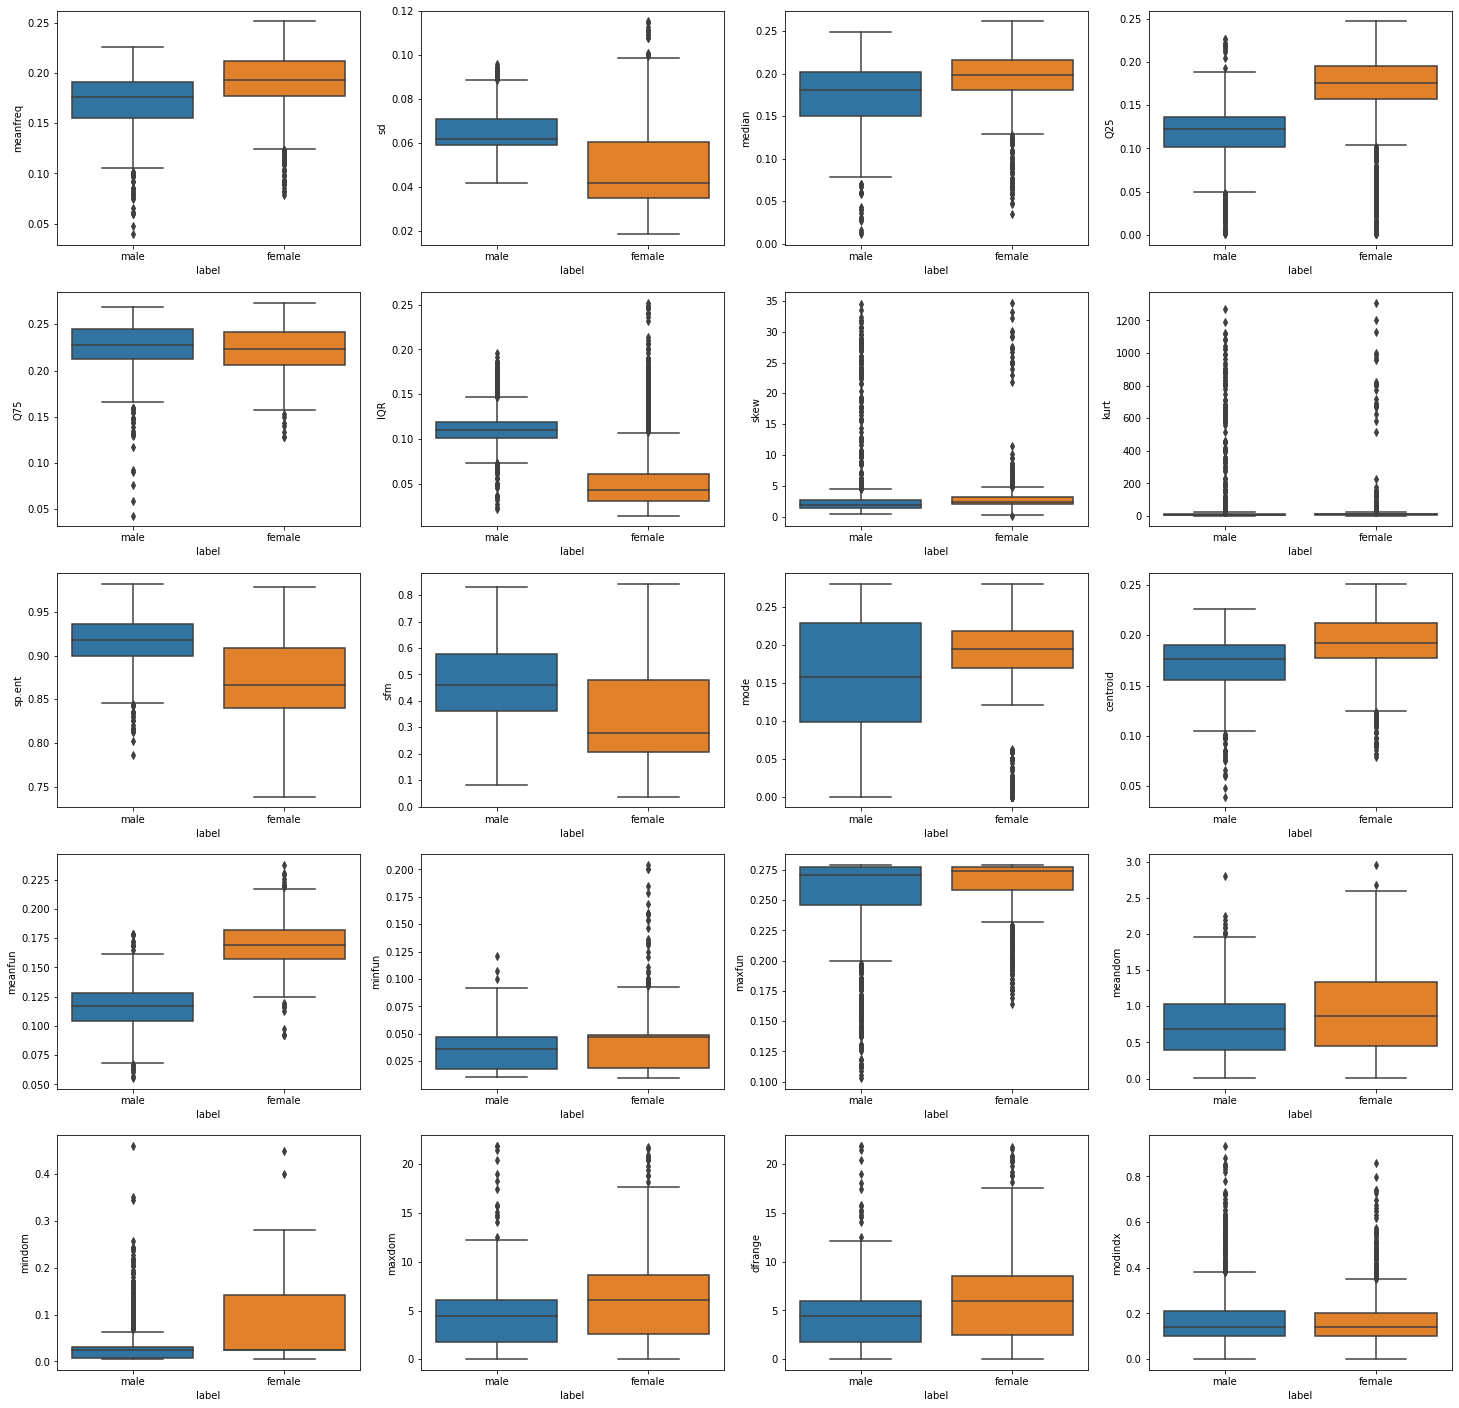

In [ ]:
#code here
import math
plt.figure(figsize=(25,25))
#plt.subplots()
#grouped_df = voice_df.groupby(voice_df['label']).boxplot("label")
col_names = list(voice_df.columns)
col_names.remove('label')
cols = 4
rows = math.ceil(len(col_names) / cols)
index = 1
#print(col_names)
for name in col_names:
    plt.subplot(rows, cols, index) 
    sns.boxplot(x='label', y=name, data=voice_df)
    index += 1

# These boxplots provide valuable comparative information regarding how the different features vary for the male and female dependent variables. 
# We can identify outliers, IQs, mean and median for each feature and for each male/female dependent variable

**2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


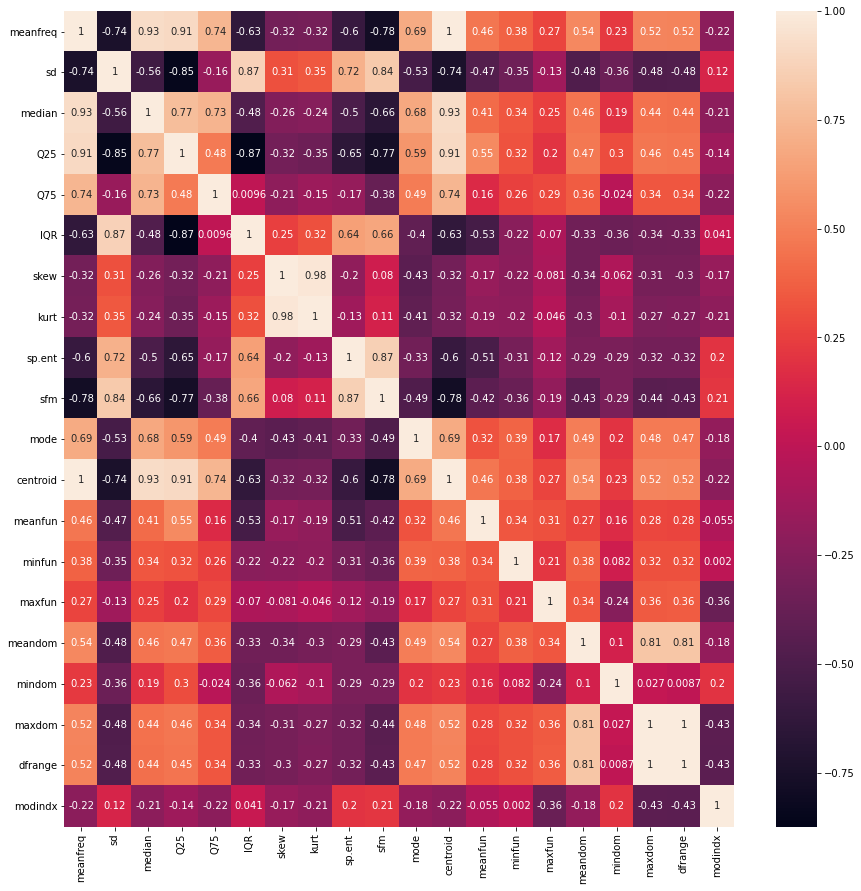

,meanfreq,sd,median,Q25,Q75,IQR,sfm,mode,centroid,meanfun,minfun,maxfun,mindom,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.007812,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.007812,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.007812,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.007812,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.039062,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.007812,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.007812,0.311002,female


In [ ]:
#code here
corrMatrix = voice_df[col_names].corr()
display(corrMatrix)

plt.figure(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Create correlation matrix
corr_matrix = voice_df[col_names].abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features 
display(voice_df.drop(voice_df[to_drop], axis=1))

# We must drop those columns before proceeding further because collinearity is something we wish to avoid when building a linear regression model



**Separating Features & Y variable from the processed dataset**

**Please note to replace the dataframe below with the new dataframe created after removing highly correlated features**

In [ ]:
# Split data into features and labels
voice_X = voice_df.drop(columns=['label']) #replace "voice_df1" with your dataframe from 2.3 to make sure the code runs
voice_y = voice_df['label']
print(voice_X.columns)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')


**2.4 Apply the following pre-processing steps:**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [ ]:
#code here
# Part 1 + 2
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
voice_y = enc.fit_transform(voice_y.to_numpy().reshape(-1,1))
#print(voice_y.shape)

# Part 3 - Split the dataset into training (60%), validation (20%), and test (20%) sets
voice_X_dev, voice_X_test, voice_y_dev, voice_y_test = train_test_split(voice_X, voice_y,train_size = 0.8, test_size=0.2,random_state=1)
voice_X_train, voice_X_val, voice_y_train, voice_y_val = train_test_split(voice_X_dev, voice_y_dev,train_size = 0.75, test_size=0.25,random_state=1)

# Part 4 - Standardize the columns in the feature matrices
scaler = StandardScaler()
voice_X_train = scaler.fit_transform(voice_X_train)
voice_X_val   = scaler.transform(voice_X_val)
voice_X_test  = scaler.transform(voice_X_test)

# Part 5 - Add a column of ones to the feature matrices of train, validation and test dataset
voice_X_train = np.append(voice_X_train, np.ones((voice_X_train.shape[0],1)), axis = 1)
voice_X_val = np.append(voice_X_val, np.ones((voice_X_val.shape[0],1)), axis = 1)
voice_X_test = np.append(voice_X_test, np.ones((voice_X_test.shape[0],1)), axis = 1)
#print(voice_X_train.shape)

**2.5 Implement Logistic Regression**

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


Implement a LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid. **You may NOT use sklearn for this implementation. It is highly recommended that you vectorize your code.**

In [ ]:
#print(voice_X_train.shape)
#print(voice_y_train.shape)

class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha, t, eta):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = np.zeros((voice_X_train.shape[1],1))

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        ### Your code here
        losses = []
        for _ in range(0,self.t):
            self.w -= self.eta*self.calculate_gradient(X,y)
            losses.append(self.calculate_loss(X,y))
        return losses
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        ### Your code here
        term = np.matmul(X,self.w)
        y_pred = self.calculate_sigmoid(term)
        
        for i in range(len(y_pred)):
            if y_pred[i]>=0.5:
                y_pred[i]=1
            if y_pred[i]<0.5:
                y_pred[i]=0
            
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        ### Your code here
        term0   = np.matmul(X,self.w)
        term1   = np.matmul(-y.transpose(),np.log10(self.calculate_sigmoid(term0)))
        term2   = np.matmul(-(1-y).transpose(),np.log10(1-self.calculate_sigmoid(term0)))
        penalty = self.alpha*np.linalg.norm(self.w,2)
        loss = term1 + term2 + penalty
        return loss
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        ### Your code here
        term0= np.matmul(X,self.w)
        #print(term0.shape)
        term = self.calculate_sigmoid(term0)-y
        #print(X.shape)
        #print(X.T.shape)
        #print(term.shape)
        gradient = np.matmul(X.T,term) + 2*self.alpha*self.w
        #print(gradient.shape)
        return gradient
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        ### Your code here
        sigmoid_x = 1/(1 + np.exp(-x))
        return sigmoid_x


**2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

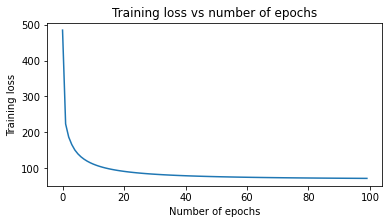

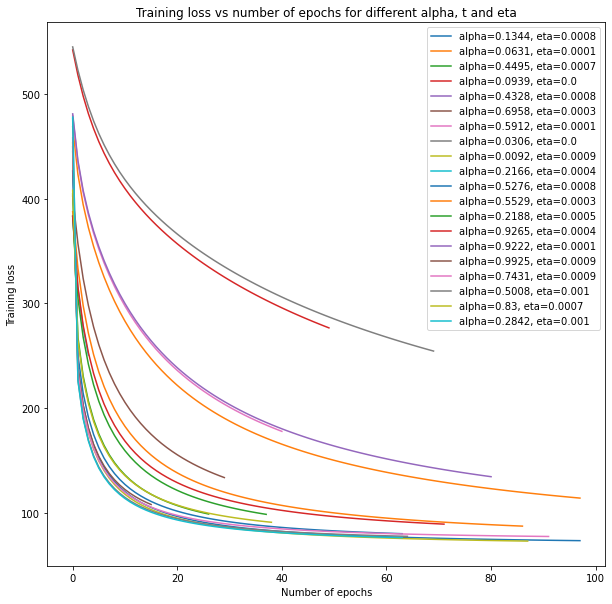

The best hyperparameters for the logistic regression are for: alpha=0.1344, eta=0.0008, t=98
The accuracy on the test dataset of scenario 1 is:  96.84543 %
The best accuracy on the test dataset of scenario 2 is:  96.84543 %


In [ ]:
#code here
# Part A
logistic_regression_model = LogisticRegression(alpha=0,t=100,eta=1e-3)
loss = logistic_regression_model.train(voice_X_train,voice_y_train)
predict = logistic_regression_model.predict(voice_X_test)
loss = np.concatenate(loss, axis=0)
plt.figure(figsize=(6,3))
plt.plot(loss)
plt.xlabel('Number of epochs')
plt.ylabel('Training loss')
plt.title('Training loss vs number of epochs')
plt.show()

# Part B
import random
random.seed(1)
alpha_random = []
eta_random   = []
t_random     = []

loss_random = []
predict_random = []

for i in range(0,20):
    alpha_random.append(random.uniform(0, 1))
    eta_random.append(random.uniform(0,0.001))
    t_random.append(random.randint(1,100))
    
#print(alpha_random)
#print(eta_random)
#print(t_random)

plt.figure(figsize=(10,10))
for i in range(0, 20):
    logistic_regression_model_random = LogisticRegression(alpha=alpha_random[i],t=t_random[i],eta=eta_random[i])
    loss_random.append(np.concatenate(logistic_regression_model_random.train(voice_X_train,voice_y_train),axis=0))
    #print(loss_random)
    predict_random.append(logistic_regression_model_random.predict(voice_X_test))
    loss_random_ = np.asarray(loss_random[i]).reshape(-1,)
    legend = 'alpha='+str(round(alpha_random[i],4))+', eta='+str(round(eta_random[i],4))
    plt.plot(loss_random_, label=legend)
    

plt.xlabel('Number of epochs')
plt.ylabel('Training loss')
plt.title('Training loss vs number of epochs for different alpha, t and eta')
plt.legend()
plt.show()

error = float('inf')
for i in range(0,20):
    the_list = loss_random[i]
    last_element = the_list=[-1]
    if loss_random[i][-1] < error:
        error = last_element
        best_alpha = alpha_random[i]
        best_eta   = eta_random[i]
        best_t     = t_random[i]
        best_index = i
print('The best hyperparameters for the logistic regression are for: alpha='+str(round(best_alpha,4))+', eta='+str(round(best_eta,4))+', t='+str(round(best_t,4)))


# Part C
score_scenario_1 = 100*sum(abs(voice_y_test - predict))/len(voice_y_test)
score_scenario_2 = 100*sum(abs(voice_y_test - predict_random[best_index]))/len(voice_y_test)
print("The accuracy on the test dataset of scenario 1 is: ",round(float(100-score_scenario_1),5), "%")
print("The best accuracy on the test dataset of scenario 2 is: ",round(float(max(100-score_scenario_2)),5), "%")
#print(sum(abs(voice_y_test - predict)))
#print(len(voice_y_test))


**2.7 Feature Importance**

Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! 

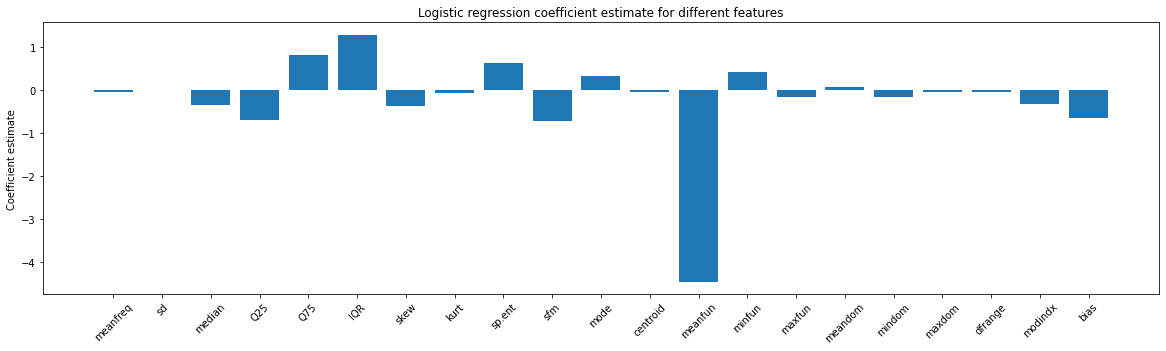

In [ ]:
#code here
plt.figure(figsize=(20,5))
x = list(voice_X.columns)
x.append('bias')
y = np.asarray(logistic_regression_model.w).reshape(-1,)
plt.bar(x,y)
plt.xticks(rotation=45)
plt.ylabel('Coefficient estimate')
plt.title('Logistic regression coefficient estimate for different features')
plt.show()

#plt.scatter(voice_X['meanfun'],voice_y)
# The meanfun feature sounds the most important feature in this model


# **Part 3: Support Vector Machines - with the same Dataset**

**3.1 Dual SVM**

A) Train a dual SVM (with default parameters) for both kernel=“linear” and kernel=“rbf”) on the Voice Recognition training data.

B) Make predictions and report the accuracy on the training, validation, and test sets. Which kernel gave better accuracy on test dataset and why do you think that was better?

C) Please report the support vectors in both the cases and what do you observe? Explain


In [ ]:
#code here
# voice_X_train voice_y_train
# voice_X_val voice y__val
# voice_X_test voice_y_test
model1 = SVC(kernel='linear')
model1.fit(voice_X_train,voice_y_train.ravel())

model2 = SVC()
model2.fit(voice_X_train,voice_y_train.ravel())

print("The accuracy of the predictions on the training set with linear kernel is: ",100*round(model1.score(voice_X_train,voice_y_train),6),"%")
print("The accuracy of the predictions on the validation set with linear kernel is: ",100*round(model1.score(voice_X_val,voice_y_val),6),"%")
print("The accuracy of the predictions on the test set with linear kernel is: ",100*round(model1.score(voice_X_test,voice_y_test),6),"%")

print("The accuracy of the predictions on the training set with rbf kernel is: ",100*round(model2.score(voice_X_train,voice_y_train),6),"%")
print("The accuracy of the predictions on the validation set with rbf kernel is: ",100*round(model2.score(voice_X_val,voice_y_val),6),"%")
print("The accuracy of the predictions on the test set with rbf kernel is: ",100*round(model2.score(voice_X_test,voice_y_test),6),"%")

# Kernel 'rbf' gave a better accuracy. 

print("The linear kernel SVM model support vector is of size: ", model1.support_vectors_.shape)
print("The rbf kernel SVM model support vector is of size: ", model2.support_vectors_.shape)

# This is because we observe that the rbf kernel SVM model support vector has more features than that of the linear kernel SVM model

#print(model1.support_vectors_)
#plt.plot(model1.support_vectors_)


The accuracy of the predictions on the training set with linear kernel is:  97.8947 %
The accuracy of the predictions on the validation set with linear kernel is:  96.53 %
The accuracy of the predictions on the test set with linear kernel is:  97.3186 %
The accuracy of the predictions on the training set with rbf kernel is:  98.8947 %
The accuracy of the predictions on the validation set with rbf kernel is:  97.1609 %
The accuracy of the predictions on the test set with rbf kernel is:  97.0032 %
The linear kernel SVM model support vector is of size:  (150, 21)
The rbf kernel SVM model support vector is of size:  (270, 21)


**3.2 Using Kernel “rbf”, tune the hyperparameter “C” using the Grid Search & k-fold cross validation. You may take k=5 and assume values in grid between 1 to 100 with interval range of your choice.**

In [ ]:
#code here
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

pipe = make_pipeline(GridSearchCV(SVC(),param_grid={"C":np.logspace(0,2,10)},cv=5,return_train_score=True))
pipe.fit(voice_X_dev,voice_y_dev.ravel())
grid_search_results = pipe.named_steps["gridsearchcv"]
print(grid_search_results)
print("The best score is : ",100*grid_search_results.best_score_,"%")
print("The best value for C is: ", grid_search_results.best_params_)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([  1.        ,   1.66810054,   2.7825594 ,   4.64158883,
         7.74263683,  12.91549665,  21.5443469 ,  35.93813664,
        59.94842503, 100.        ])},
             return_train_score=True)
The best score is :  71.54742693204233 %
The best value for C is:  {'C': 100.0}
